# ENSF 592 - FINAL PROJECT
## Calgary Accident Analysis
### By: Mike Lasby

# README
This notebook is the entry point of our project and functions as the View. The notebook depends on the Controller.py class to retrieve views of our data from the Model. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from geojson import Point, MultiLineString
import geopandas as gpdnum_points
import re
import math
from folium_0_12 import folium #using pre relased v0.12 due to heatmap issues 
# NOTE:  https://github.com/python-visualization/folium/issues/1271
import matplotlib.pyplot as plt
from controller import Controller

In [2]:
ctrl = Controller()
ctrl.load_data()
ctrl.add_geo_cols()
ctrl.add_cell_col()
ctrl.get_cell_data()
ctrl.generate_maps()

Loading Data...
Getting weather at yyc for month 1 in 2018
Getting weather at yyc for month 2 in 2018
Getting weather at yyc for month 3 in 2018
Getting weather at yyc for month 4 in 2018
Getting weather at yyc for month 5 in 2018
Getting weather at yyc for month 6 in 2018
Getting weather at yyc for month 7 in 2018
Getting weather at yyc for month 8 in 2018
Getting weather at yyc for month 9 in 2018
Getting weather at yyc for month 10 in 2018
Getting weather at yyc for month 11 in 2018
Getting weather at yyc for month 12 in 2018
...Data Loaded.
Adding geometry column to speeds from multiline. Flip coords? True
Adding geometry column to volumes from multilinestring. Flip coords? True
Adding geometry column to incidents from location. Flip coords? False
Adding geometry column to cameras from None. Flip coords? True
Adding geometry column to signals from Point. Flip coords? True
Adding geometry column to signs from POINT. Flip coords? True
Adding geometry column to cells from cell_bounds.

In [3]:
cells = ctrl.get_frame('cells')
cells

cell_bounds  avg_speed  volume_sum  \
0   [[50.842822, -114.315796], [50.8797823, -114.2...        NaN         NaN   
1   [[50.842822, -114.2702069], [50.8797823, -114....        NaN         NaN   
2   [[50.842822, -114.2246178], [50.8797823, -114....        NaN         NaN   
3   [[50.842822, -114.1790287], [50.8797823, -114....        NaN         NaN   
4   [[50.842822, -114.1334396], [50.8797823, -114....        NaN      2000.0   
..                                                ...        ...         ...   
95  [[51.175464700000006, -114.0878505], [51.21242...      65.71     23000.0   
96  [[51.175464700000006, -114.0422614], [51.21242...      80.09    167000.0   
97  [[51.175464700000006, -113.9966723], [51.21242...      63.03     41000.0   
98  [[51.175464700000006, -113.9510832], [51.21242...        NaN     40000.0   
99  [[51.175464700000006, -113.9054941], [51.21242...        NaN         NaN   

    incident_count  sign_count  signal_count  \
0                0           0             0   
1                0           0             0   
2                0           0             0   
3                0           0             0   
4                0          54             0   
..             ...         ...           ...   
95               5         342             1   
96              22          52             0   
97              20          27             0   
98               1           2             0   
99               0           0             0   

                                                cells  \
0   <folium.vector_layers.Rectangle object at 0x7f...   
1   <folium.vector_layers.Rectangle object at 0x7f...   
2   <folium.vector_layers.Rectangle object at 0x7f...   
3   <folium.vector_layers.Rectangle object at 0x7f...   
4   <folium.vector_layers.Rectangle object at 0x7f...   
..                                                ...   
95  <folium.vector_layers.Rectangle object at 0x7f...   
96  <folium.vector_layers.Rectangle object at 0x7f...   
97  <folium.vector_layers.Rectangle object at 0x7f...   
98  <folium.vector_layers.Rectangle object at 0x7f...   
99  <folium.vector_layers.Rectangle object at 0x7f...   

                                            vol_cells  \
0   <folium.vector_layers.Rectangle object at 0x7f...   
1   <folium.vector_layers.Rectangle object at 0x7f...   
2   <folium.vector_layers.Rectangle object at 0x7f...   
3   <folium.vector_layers.Rectangle object at 0x7f...   
4   <folium.vector_layers.Rectangle object at 0x7f...   
..                                                ...   
95  <folium.vector_layers.Rectangle object at 0x7f...   
96  <folium.vector_layers.Rectangle object at 0x7f...   
97  <folium.vector_layers.Rectangle object at 0x7f...   
98  <folium.vector_layers.Rectangle object at 0x7f...   
99  <folium.vector_layers.Rectangle object at 0x7f...   

                                          speed_cells  
0   <folium.vector_layers.Rectangle object at 0x7f...  
1   <folium.vector_layers.Rectangle object at 0x7f...  
2   <folium.vector_layers.Rectangle object at 0x7f...  
3   <folium.vector_layers.Rectangle object at 0x7f...  
4   <folium.vector_layers.Rectangle object at 0x7f...  
..                                                ...  
95  <folium.vector_layers.Rectangle object at 0x7f...  
96  <folium.vector_layers.Rectangle object at 0x7f...  
97  <folium.vector_layers.Rectangle object at 0x7f...  
98  <folium.vector_layers.Rectangle object at 0x7f...  
99  <folium.vector_layers.Rectangle object at 0x7f...  

[100 rows x 9 columns]

In [4]:
mapa = ctrl.get_map('cell_map')
mapa


In [5]:
# #Speed Polylines Map

ctrl.draw_speed_map()
ctrl.get_map('speed_map')

map saved


In [6]:
#  #HEATMAP
ctrl.gen_heatmap()
ctrl.get_map('volume_map')




map saved


In [ ]:
%%html
<iframe src="index.html" frameborder = "0" width = "960" height = "600" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>

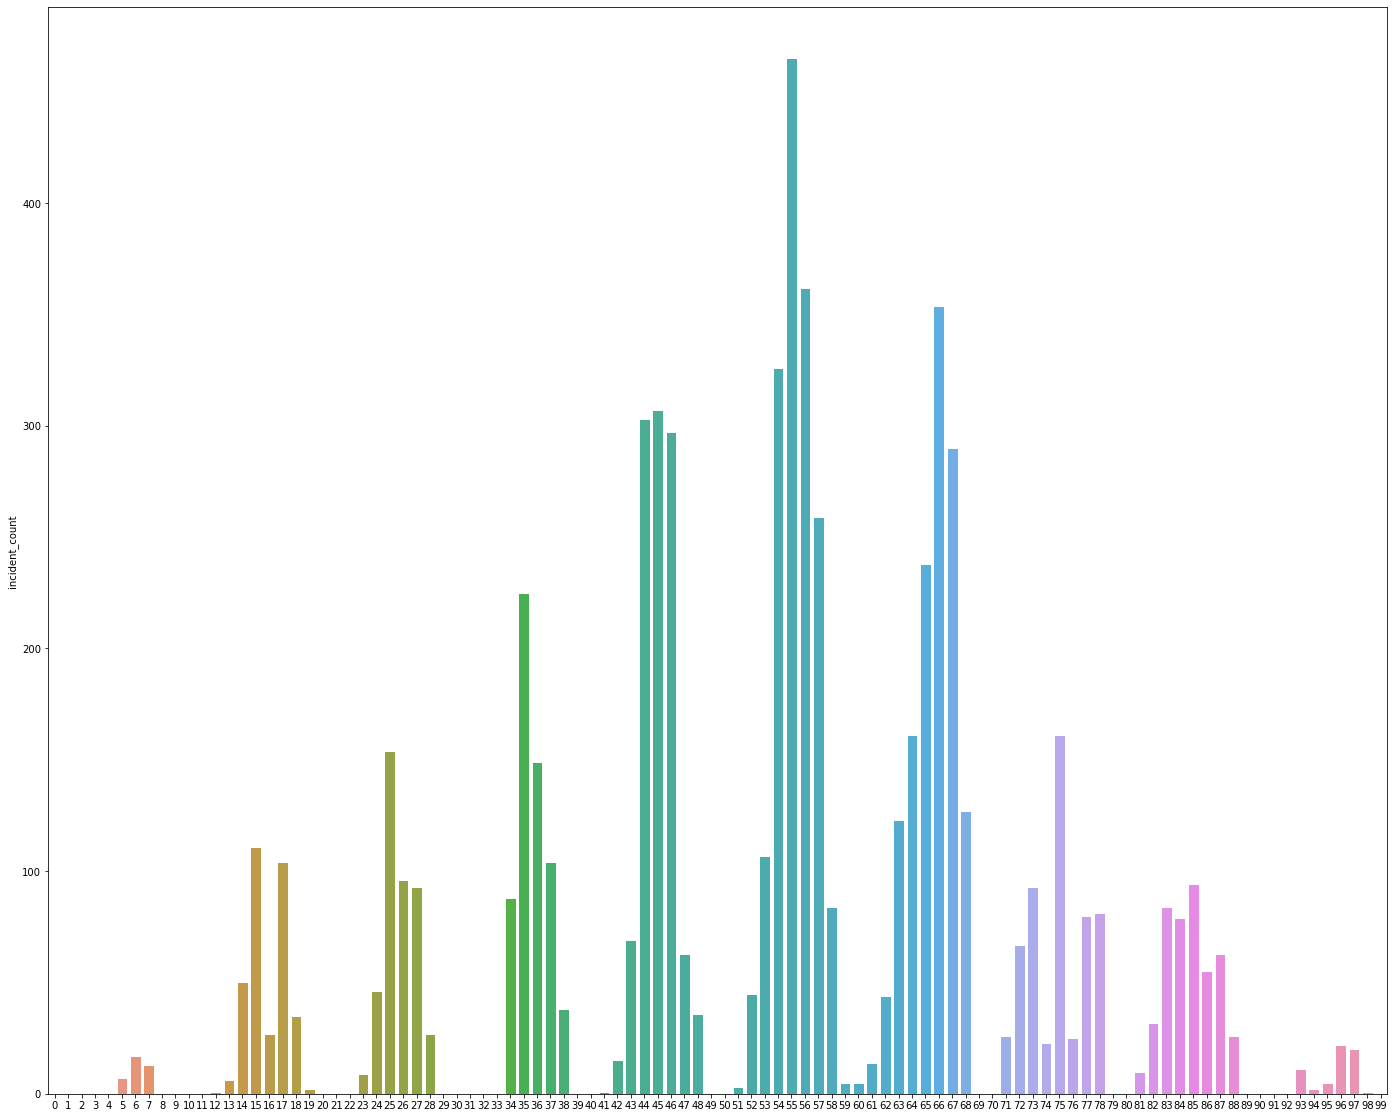

In [4]:
cells = ctrl.get_frame('cells')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24,20)) #we want to plot side by side and to that figsize
sns.set_style('whitegrid')
sns.barplot(x=cells.index, y = cells['incident_count'], data =cells)
fig.show()

# Histograms

In [5]:
cells

cell_bounds  avg_speed  volume_sum  \
0   [[50.842822, -114.315796], [50.8797823, -114.2...        NaN         NaN   
1   [[50.842822, -114.2702069], [50.8797823, -114....        NaN         NaN   
2   [[50.842822, -114.2246178], [50.8797823, -114....        NaN         NaN   
3   [[50.842822, -114.1790287], [50.8797823, -114....        NaN         NaN   
4   [[50.842822, -114.1334396], [50.8797823, -114....        NaN      2000.0   
..                                                ...        ...         ...   
95  [[51.175464700000006, -114.0878505], [51.21242...      65.71     23000.0   
96  [[51.175464700000006, -114.0422614], [51.21242...      80.09    167000.0   
97  [[51.175464700000006, -113.9966723], [51.21242...      63.03     41000.0   
98  [[51.175464700000006, -113.9510832], [51.21242...        NaN     40000.0   
99  [[51.175464700000006, -113.9054941], [51.21242...        NaN         NaN   

    incident_count  sign_count  signal_count  camera_count  \
0                0           0             0             0   
1                0           0             0             0   
2                0           0             0             0   
3                0           0             0             0   
4                0          54             0             0   
..             ...         ...           ...           ...   
95               5         342             1             0   
96              22          52             0             0   
97              20          27             0             0   
98               1           2             0             0   
99               0           0             0             0   

                                                cells  \
0   <folium.vector_layers.Rectangle object at 0x7f...   
1   <folium.vector_layers.Rectangle object at 0x7f...   
2   <folium.vector_layers.Rectangle object at 0x7f...   
3   <folium.vector_layers.Rectangle object at 0x7f...   
4   <folium.vector_layers.Rectangle object at 0x7f...   
..                                                ...   
95  <folium.vector_layers.Rectangle object at 0x7f...   
96  <folium.vector_layers.Rectangle object at 0x7f...   
97  <folium.vector_layers.Rectangle object at 0x7f...   
98  <folium.vector_layers.Rectangle object at 0x7f...   
99  <folium.vector_layers.Rectangle object at 0x7f...   

                                            vol_cells  \
0   <folium.vector_layers.Rectangle object at 0x7f...   
1   <folium.vector_layers.Rectangle object at 0x7f...   
2   <folium.vector_layers.Rectangle object at 0x7f...   
3   <folium.vector_layers.Rectangle object at 0x7f...   
4   <folium.vector_layers.Rectangle object at 0x7f...   
..                                                ...   
95  <folium.vector_layers.Rectangle object at 0x7f...   
96  <folium.vector_layers.Rectangle object at 0x7f...   
97  <folium.vector_layers.Rectangle object at 0x7f...   
98  <folium.vector_layers.Rectangle object at 0x7f...   
99  <folium.vector_layers.Rectangle object at 0x7f...   

                                          speed_cells  
0   <folium.vector_layers.Rectangle object at 0x7f...  
1   <folium.vector_layers.Rectangle object at 0x7f...  
2   <folium.vector_layers.Rectangle object at 0x7f...  
3   <folium.vector_layers.Rectangle object at 0x7f...  
4   <folium.vector_layers.Rectangle object at 0x7f...  
..                                                ...  
95  <folium.vector_layers.Rectangle object at 0x7f...  
96  <folium.vector_layers.Rectangle object at 0x7f...  
97  <folium.vector_layers.Rectangle object at 0x7f...  
98  <folium.vector_layers.Rectangle object at 0x7f...  
99  <folium.vector_layers.Rectangle object at 0x7f...  

[100 rows x 10 columns]

# Speed Analysis

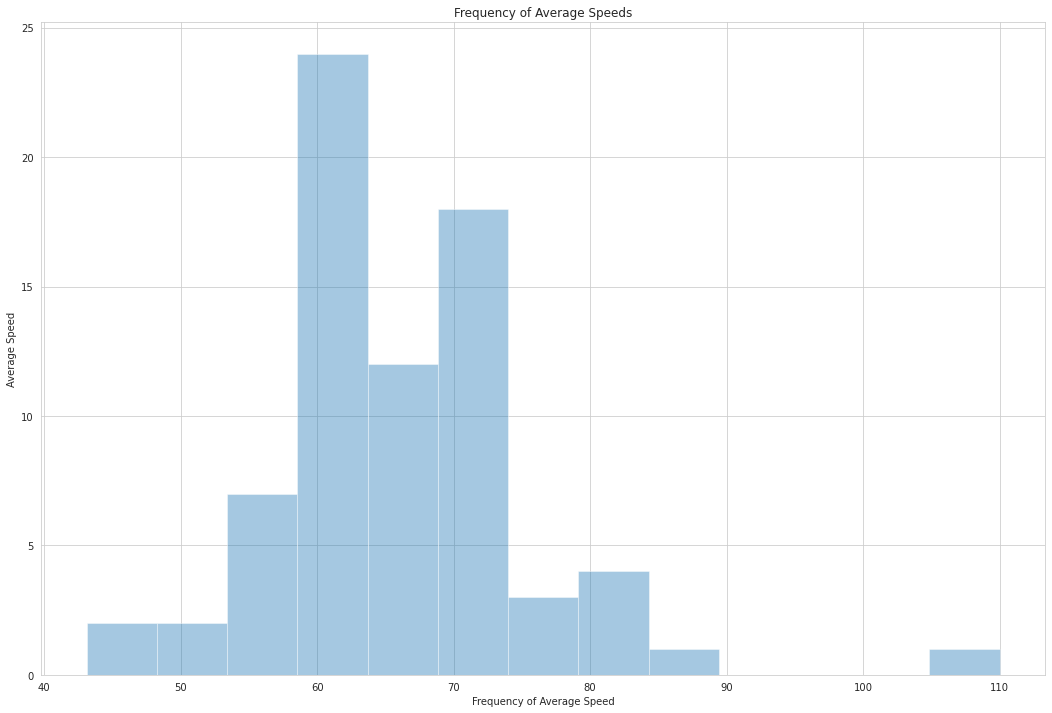

In [62]:
cells = ctrl.get_frame('cells')
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12)) 
sns.distplot(cells['avg_speed'], kde=False)
ax.set_xlabel('Frequency of Average Speed')
ax.set_ylabel('Average Speed')
ax.set_title('Frequency of Average Speeds')
fig.show()


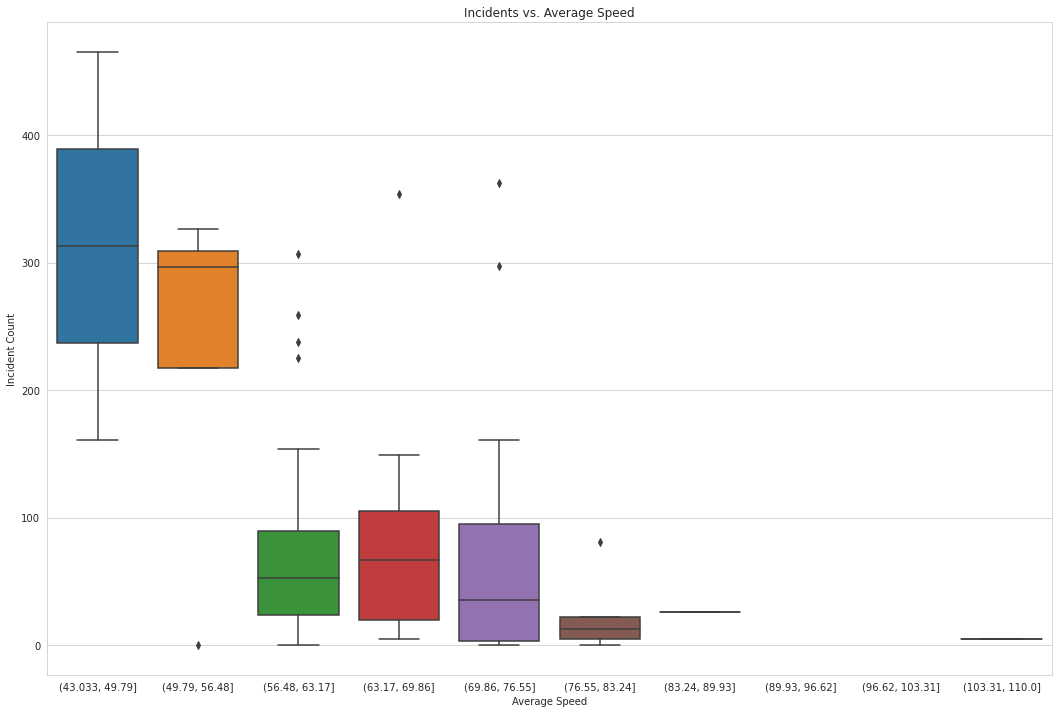

In [57]:
cells = ctrl.get_frame('cells')
cells['speed_bins']  = pd.cut(cells['avg_speed'], bins =10)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12)) 
sns.boxplot(x = 'speed_bins', y='incident_count', data=cells)
ax.set_xlabel('Average Speed')
ax.set_ylabel('Incident Count')
ax.set_title('Incidents vs. Average Speed')
fig.show()

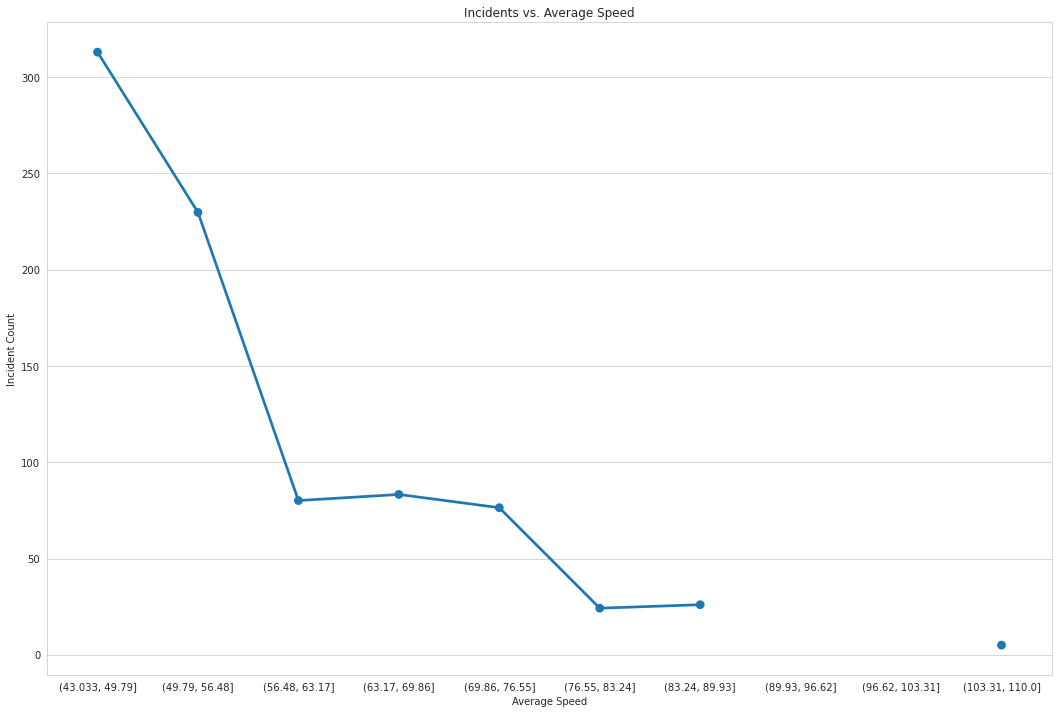

In [56]:
cells = ctrl.get_frame('cells')
cells['speed_bins']  = pd.cut(cells['avg_speed'], bins =10)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12)) 
sns.pointplot(x='speed_bins',y='incident_count',hue=None, data=cells, ci=None)
ax.set_xlabel('Average Speed')
ax.set_ylabel('Incident Count')
ax.set_title('Incidents vs. Average Speed')
fig.show()

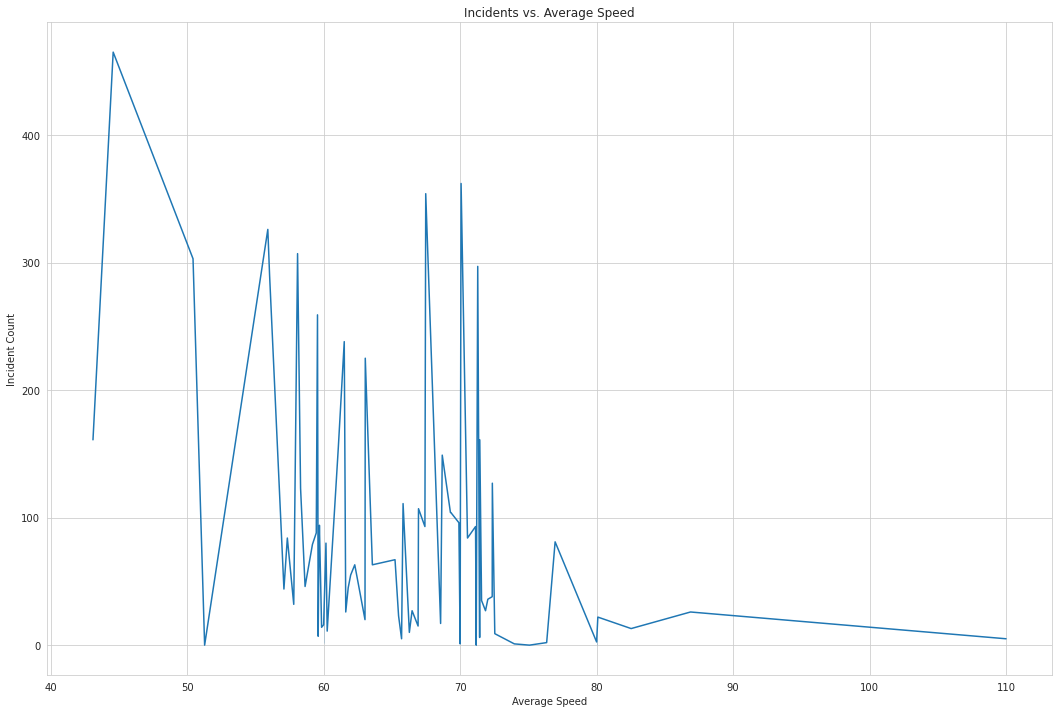

In [77]:
cells = ctrl.get_frame('cells')
cells['speed_bins']  = pd.cut(cells['avg_speed'], bins =10)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12)) 
sns.lineplot(x='avg_speed',y='incident_count',hue=None, data=cells)
ax.set_xlabel('Average Speed')
ax.set_ylabel('Incident Count')
ax.set_title('Incidents vs. Average Speed')
fig.show()

In [124]:
cells = ctrl.get_frame('cells')
cells['speed_bins']  = pd.cut(cells['avg_speed'], bins =10)
cells['inc_bins'] = pd.cut(cells['incident_count'], bins =10)
# display(cells)
# print(cells['speed_bins'].unique())

speed_pivot = pd.pivot_table(cells, index = 'speed_bins')
# display(speed_pivot)

inc_pivot = pd.pivot_table(cells, index= 'incident_count')
# display(inc_pivot)

cell_coor = cells.corr(method='spearman')
  

def get_spearman_corr(col_name):
    df = ctrl.get_frame('cells')
    controlled_var = df[col_name]
    responding_var = df['incident_count']
    corr = responding_var.corr(controlled_var)
    print(f'{col_name} vs. incidents = {corr}')
    corr = responding_var.corr(controlled_var)
    return corr

get_spearman_corr('avg_speed')
get_spearman_corr('volume_sum')
get_spearman_corr('camera_count')
get_spearman_corr('sign_count')
get_spearman_corr('signal_count')

corr_matrix = ctrl.get_frame('temporal').corr()
display(corr_matrix[['Visibility (km)', 'Temp (C)']])
    

# fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12)) 
# print(cells.pivot('speed_bins'))
# sns.heatmap(inc_pivot)
# ax.set_xlabel('Average Speed')
# ax.set_ylabel('Incident Count')
# ax.set_title('Incidents vs. Average Speed')
# fig.show()

avg_speed vs. incidents = -0.3545259450024466
volume_sum vs. incidents = 0.9069232679383176
camera_count vs. incidents = 0.846082463153411
sign_count vs. incidents = 0.7572975441398317
signal_count vs. incidents = 0.8184748658442726


Visibility (km)      Temp (C)
Longitude (x)          -3.593517e-14 -6.181607e-15
Latitude (y)           -3.367282e-14 -3.066486e-14
Climate ID                       NaN           NaN
Year                             NaN           NaN
Month                  -3.177971e-02  2.422616e-01
Day                     3.700282e-02  1.054288e-01
Temp (C)                2.193018e-01  1.000000e+00
Temp Flag                        NaN           NaN
Dew Point Temp (C)     -2.945970e-02  8.502978e-01
Dew Point Temp Flag              NaN           NaN
Rel Hum (%)            -5.127628e-01 -5.927232e-01
Rel Hum Flag                     NaN           NaN
Wind Dir (10s deg)      4.374577e-02  3.032221e-02
Wind Dir Flag                    NaN           NaN
Wind Spd (km/h)         4.524092e-02  1.558499e-01
Wind Spd Flag                    NaN           NaN
Visibility (km)         1.000000e+00  2.193018e-01
Visibility Flag                  NaN           NaN
Stn Press (kPa)        -8.710312e-02 -3.140997e-02
Stn Press Flag                   NaN           NaN
Hmdx                   -1.994964e-01  8.301933e-01
Hmdx Flag                        NaN           NaN
Wind Chill              1.476840e-01  9.562291e-01
Wind Chill Flag                  NaN           NaN
incidents               8.544757e-02 -1.138292e-02

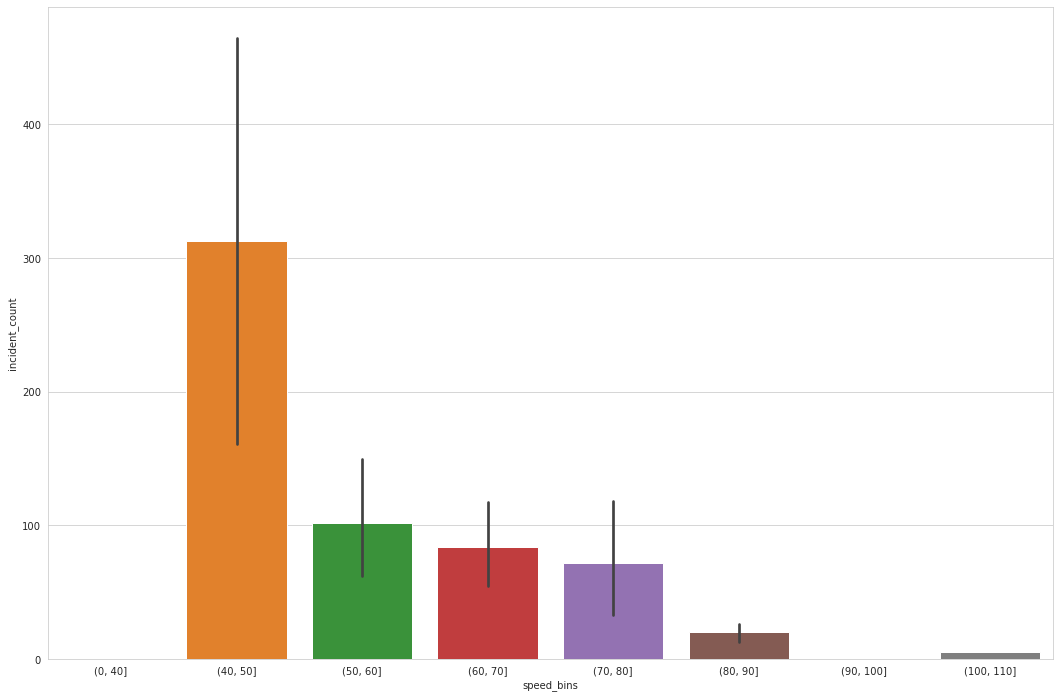

In [37]:
cells = ctrl.get_frame('cells')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12)) 


cells['speed_bins'] = pd.cut(x=cells['avg_speed'], bins = [0, 40, 50, 60, 70, 80, 90, 100, 110])

speed_data = cells.groupby('speed_bins')['incident_count'].mean()
# print(speed_data)
sns.barplot(x='speed_bins', y = 'incident_count', data=cells,  ax = binned_mean_ax)
fig.show()

In [ ]:
cells = ctrl.get_frame('cells')

fig, binned_mean_ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12)) 


cells['speed_bins'] = pd.cut(x=cells['avg_speed'], bins = [0, 40, 50, 60, 70, 80, 90, 100, 110])

speed_bins
(0, 30]              NaN
(30, 40]             NaN
(40, 50]      313.000000
(50, 60]      102.045455
(60, 70]       83.814815
(70, 80]       71.789474
(80, 90]       20.333333
(90, 100]            NaN
(100, 110]      5.000000
Name: incident_count, dtype: float64


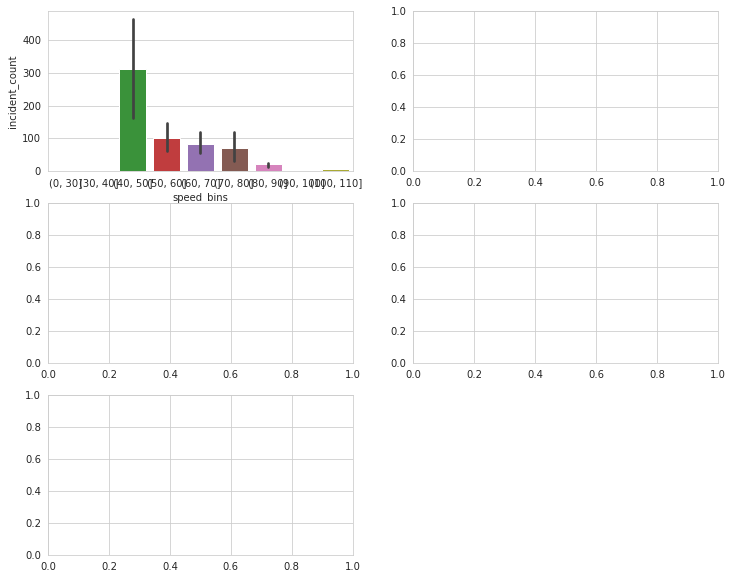

In [28]:
# inc_group = cells.groupby(by='incident_count')

cells['speed_bins'] = pd.cut(x=cells['avg_speed'], bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 110])

speed_data = cells.groupby('speed_bins')['incident_count'].mean()
print(speed_data)
# speed_data = cells.groupby(by = 'avg_speed')['incident_count'].count()
# print(speed_data)
# vol_data = inc_group['volume_sum'].mean()
# cam_data = inc_group['camera_count'].mean()
# signal_data = inc_group['signal_count'].mean()
# sign_data = inc_group['sign_count'].mean()

fig, ( (speed_ax, vol_ax), (cam_ax, signal_ax), (sign_ax, unused_ax) ) = plt.subplots(nrows = 3, ncols = 2, figsize = (12,10)) 


sns.barplot(x='speed_bins', y = 'incident_count', data=cells,  ax = speed_ax)
# speed_ax.set_xlabel('')
# sns.distplot(vol_data, kde = False, ax = vol_ax)
# sns.distplot(cam_data, kde = False, ax = cam_ax)
# sns.distplot(signal_data, kde = False, ax = signal_ax)
# sns.distplot(sign_data, kde = False, ax = sign_ax)
fig.delaxes(unused_ax)
fig.show()

In [4]:
df = ctrl.get_frame('temporal')

Longitude (x)  Latitude (y)    Station Name  Climate ID  \
0           -114.01         51.12  CALGARY INTL A     3031092   
1           -114.01         51.12  CALGARY INTL A     3031092   
2           -114.01         51.12  CALGARY INTL A     3031092   
3           -114.01         51.12  CALGARY INTL A     3031092   
4           -114.01         51.12  CALGARY INTL A     3031092   
...             ...           ...             ...         ...   
8746        -114.01         51.12  CALGARY INTL A     3031092   
8747        -114.01         51.12  CALGARY INTL A     3031092   
8748        -114.01         51.12  CALGARY INTL A     3031092   
8749        -114.01         51.12  CALGARY INTL A     3031092   
8750        -114.01         51.12  CALGARY INTL A     3031092   

             Date/Time  Year  Month  Day   Time  Temp (C)  ...  \
0     2018-01-01 06:00  2018      1    1  06:00     -26.6  ...   
1     2018-01-01 07:00  2018      1    1  07:00     -22.7  ...   
2     2018-01-01 08:00  2018      1    1  08:00     -22.3  ...   
3     2018-01-01 09:00  2018      1    1  09:00     -19.8  ...   
4     2018-01-01 10:00  2018      1    1  10:00     -18.0  ...   
...                ...   ...    ...  ...    ...       ...  ...   
8746  2018-12-31 16:00  2018     12   31  16:00      -9.0  ...   
8747  2018-12-31 17:00  2018     12   31  17:00     -11.5  ...   
8748  2018-12-31 18:00  2018     12   31  18:00     -11.9  ...   
8749  2018-12-31 19:00  2018     12   31  19:00     -12.8  ...   
8750  2018-12-31 20:00  2018     12   31  20:00     -12.2  ...   

      Visibility Flag  Stn Press (kPa)  Stn Press Flag  Hmdx  Hmdx Flag  \
0                 NaN            89.89             NaN   NaN        NaN   
1                 NaN            89.88             NaN   NaN        NaN   
2                 NaN            89.83             NaN   NaN        NaN   
3                 NaN            89.81             NaN   NaN        NaN   
4                 NaN            89.78             NaN   NaN        NaN   
...               ...              ...             ...   ...        ...   
8746              NaN            89.56             NaN   NaN        NaN   
8747              NaN            89.47             NaN   NaN        NaN   
8748              NaN            89.34             NaN   NaN        NaN   
8749              NaN            89.31             NaN   NaN        NaN   
8750              NaN            89.25             NaN   NaN        NaN   

      Wind Chill  Wind Chill Flag       Weather                date  incidents  
0          -29.0              NaN           NaN 2018-01-01 06:00:00          2  
1          -28.0              NaN           NaN 2018-01-01 07:00:00          0  
2          -29.0              NaN         Clear 2018-01-01 08:00:00          0  
3          -27.0              NaN           NaN 2018-01-01 09:00:00          3  
4          -27.0              NaN           NaN 2018-01-01 10:00:00          1  
...          ...              ...           ...                 ...        ...  
8746       -16.0              NaN           NaN 2018-12-31 16:00:00          1  
8747       -18.0              NaN  Mainly Clear 2018-12-31 17:00:00          2  
8748       -18.0              NaN           NaN 2018-12-31 18:00:00          1  
8749       -19.0              NaN           NaN 2018-12-31 19:00:00          0  
8750       -17.0              NaN  Mainly Clear 2018-12-31 20:00:00          2  

[8751 rows x 30 columns]

In [3]:
df = ctrl.get_frame('temporal')
df
display(df['date'].iloc[0].hour)

df[(df['date'] > '2018-01-01 00:00:00') & (df['date'] < '2018-01-02 00:00:00')]

filt = (df['date'] > '2018-01-01 00:00:00') & (df['date'] < '2018-01-02 00:00:00')
print(filt)

6

0        True
1        True
2        True
3        True
4        True
        ...  
8746    False
8747    False
8748    False
8749    False
8750    False
Name: date, Length: 8751, dtype: bool


In [10]:
#TODO: Optimize?
def count_points(cell_idx, df_name, col_name="cell"):
    df = ctrl.get_frame(df_name)
    # print(f'testing cell {cell_idx}')
    counter = 0
    for _, cell in df[col_name].items(): 
        if cell_idx == cell:
            counter +=1
    return counter

i = 0 
inc_count = []

while i<100: 
    inc_count.append(count_points(i, 'signs', 'cell'))
    i += 1
print(inc_count)
cells['temp'] = inc_count

display(cells.sort_values(by='incident_count', ascending=False))


[0, 0, 0, 0, 54, 303, 1487, 756, 27, 5, 0, 0, 93, 241, 2409, 3905, 1489, 3479, 2428, 70, 0, 0, 2, 417, 2700, 3442, 2693, 2372, 1078, 119, 0, 0, 0, 260, 3199, 5268, 3147, 1711, 417, 165, 0, 68, 1359, 3024, 5722, 7204, 1813, 2714, 150, 7, 0, 63, 3841, 6470, 12676, 33465, 5590, 5514, 2100, 118, 116, 893, 3430, 6108, 6781, 7761, 2475, 4428, 2586, 15, 26, 2206, 4375, 3788, 963, 3280, 267, 2616, 2841, 0, 0, 1480, 1341, 2145, 3087, 3376, 1405, 1681, 346, 8, 0, 18, 84, 845, 644, 342, 52, 27, 2, 0]


cells  \
55  <folium.vector_layers.Rectangle object at 0x7f...   
56  <folium.vector_layers.Rectangle object at 0x7f...   
66  <folium.vector_layers.Rectangle object at 0x7f...   
54  <folium.vector_layers.Rectangle object at 0x7f...   
45  <folium.vector_layers.Rectangle object at 0x7f...   
..                                                ...   
39  <folium.vector_layers.Rectangle object at 0x7f...   
40  <folium.vector_layers.Rectangle object at 0x7f...   
49  <folium.vector_layers.Rectangle object at 0x7f...   
1   <folium.vector_layers.Rectangle object at 0x7f...   
99  <folium.vector_layers.Rectangle object at 0x7f...   

                                            vol_cells  \
55  <folium.vector_layers.Rectangle object at 0x7f...   
56  <folium.vector_layers.Rectangle object at 0x7f...   
66  <folium.vector_layers.Rectangle object at 0x7f...   
54  <folium.vector_layers.Rectangle object at 0x7f...   
45  <folium.vector_layers.Rectangle object at 0x7f...   
..                                                ...   
39  <folium.vector_layers.Rectangle object at 0x7f...   
40  <folium.vector_layers.Rectangle object at 0x7f...   
49  <folium.vector_layers.Rectangle object at 0x7f...   
1   <folium.vector_layers.Rectangle object at 0x7f...   
99  <folium.vector_layers.Rectangle object at 0x7f...   

                                          speed_cells  \
55  <folium.vector_layers.Rectangle object at 0x7f...   
56  <folium.vector_layers.Rectangle object at 0x7f...   
66  <folium.vector_layers.Rectangle object at 0x7f...   
54  <folium.vector_layers.Rectangle object at 0x7f...   
45  <folium.vector_layers.Rectangle object at 0x7f...   
..                                                ...   
39  <folium.vector_layers.Rectangle object at 0x7f...   
40  <folium.vector_layers.Rectangle object at 0x7f...   
49  <folium.vector_layers.Rectangle object at 0x7f...   
1   <folium.vector_layers.Rectangle object at 0x7f...   
99  <folium.vector_layers.Rectangle object at 0x7f...   

                                          cell_bounds  avg_speed  volume_sum  \
55  [[51.027623500000004, -114.0878505], [51.06458...  44.578947   3802000.0   
56  [[51.027623500000004, -114.0422614], [51.06458...  70.073574   1452000.0   
66  [[51.0645838, -114.0422614], [51.1015441, -113...  67.477387   2002000.0   
54  [[51.027623500000004, -114.1334396], [51.06458...  55.912007   1834000.0   
45  [[50.9906632, -114.0878505], [51.0276235000000...  58.088332   1451000.0   
..                                                ...        ...         ...   
39  [[50.953702899999996, -113.9054941], [50.99066...        NaN     34000.0   
40  [[50.9906632, -114.315796], [51.02762350000000...        NaN         NaN   
49  [[50.9906632, -113.9054941], [51.0276235000000...  80.000000         NaN   
1   [[50.842822, -114.2702069], [50.8797823, -114....        NaN         NaN   
99  [[51.175464700000006, -113.9054941], [51.21242...        NaN         NaN   

    incident_count  sign_count  signal_count   temp  
55             465       33465           223  33465  
56             362        5590            38   5590  
66             354        2475            36   2475  
54             326       12676            77  12676  
45             307        7204            61   7204  
..             ...         ...           ...    ...  
39               0         165             0    165  
40               0           0             0      0  
49               0           7             0      7  
1                0           0             0      0  
99               0           0             0      0  

[100 rows x 10 columns]

In [4]:
#GET VOLUME WEIGHTED POLYLINE
#TODO: Fix line plotting if we have time
    
def rgb_to_hex(rgb):
    '''Method converts (r,g,b) to hex color, helper for map functons'''
    # '%' format operator, '02x' hexadecimal form.
    # This line says get hexidecimal by parsing three items from tuple
    return '#'+'%02x%02x%02x' % rgb


def draw_vol_map(mapa, volume_frame):
    '''get volume map
    @args: volume_frame :pd.DataFrame to map
    @return folium map NOTE: front end will simply render map.html from assets
    '''
    calgary_map = mapa
    color_increments = 256  # 0-255
    color_steps = len(volume_frame)  # number of data entries
    n_color = color_steps // color_increments  # change color every n_color steps
    step_counter = 0
    step = 256//color_steps
    if step == 0:
        step = 1
    r = 255  # since we sorted above, the largest volume will be red, green lightest volume
    g = 0
    b = 0

    volume_frame = volume_frame.sort_values(by = 'VOLUME', ascending = False)

    display(volume_frame)

    for index, items in volume_frame.iterrows():
        secname = items['SECNAME']
        volume = items['VOLUME']
        the_geom = items['multilinestring']
        # print(the_geom)
        # print(type(the_geom))
        year = items['YEAR']
        if step_counter > n_color:  # Check if we need to change color
            r -= step
            g += step
            step_counter = 0
        point_cloud = []
        color = rgb_to_hex((r, g, b))
        # strip everything outside of (( ))
        location = re.search(r'\(\((.*?)\)\)', the_geom)
        for loc in location.groups(1):
            loc = loc.split(',')  # split coordinate pairs
            for point in loc:
                point = point.strip().split(' ')
                lon = point[0].strip(')').strip(
                    '(')  # remove any remaining parenthesis
                lon = float(lon)  # convert from string
                lat = point[1].strip('(').strip(')')
                lat = float(lat)
                point_cloud.append([lat, lon])
        polyline = folium.PolyLine(
            locations=point_cloud, tooltip=f'{secname}\n {volume} number of cars in {year}', color=color).add_to(calgary_map)
        step_counter += 1
    print(f"Saving total volume {year} map")
    calgary_map.save('index.html', zoom_start=5)
    return calgary_map

# mapa = generate_map()
# mapa = draw_vol_map(mapa, ctrl.get_frame('volumes'))

In [10]:
df = ctrl.get_frame('temporal')
# display(df)



# display(df['Temp (C)'])

def melt_freeze(temps, freeze_temp, target = 8):
    '''
    return pd.Series bool filter of  hours from 2018 such that Ti is an hour where the temperature fell below freeze_temp (C). Targets Ti are the ith hours after the freeze_temp occured. 

    :Params:    temps: pd.Series of hourly temperatures degrees C
                freeze_temp: temperature of interest 
                target: number of temperatures to capture after the freeze_temp. 
    :Returns:  pd.Series bool filter
    '''
    then = 0
    now = 1
    freeze = freeze_temp

    #list of target hours
    hours=[]

    #pivot + 8 hours
    target = target 

    #  Assume typical dangerous freeze near midnight and we wish to capture the morning     rush hour between 6-8am . 
    
    while then < temps.size: 
        target_hours = []
        try: 
            if temps[now] <= freeze and temps[then] > freeze:
                # print('hit')
                idx = 0
                while idx < target: 
                    target_hours.append(now+idx)
                    idx+=1
                hours.append(target_hours)
            then +=1
            now +=1
        except: 
            then +=1
            now +=1
            continue

    mask_indices =[]
    for targets in hours: 
        for target in targets: 
            if target in mask_indices: 
                continue
            else: 
                mask_indices.append(target)

    mask = []
    idx = 0
    while idx < temps.size:
        if idx in mask_indices:
            mask.append(True)
        else:
            mask.append(False)
        idx += 1
    mask = pd.Series(mask)
    print(f'There were {len(hours)} melt-freeze cycles in 2018!')
    return(mask)

mask = melt_freeze(df['Temp (C)'], 0, 8)


df['date'].loc[mask]







There were 143 melt-freeze cycles in 2018!


35     2018-01-02 17:00:00
36     2018-01-02 18:00:00
37     2018-01-02 19:00:00
38     2018-01-02 20:00:00
39     2018-01-02 21:00:00
               ...        
8712   2018-12-30 06:00:00
8713   2018-12-30 07:00:00
8714   2018-12-30 08:00:00
8715   2018-12-30 09:00:00
8716   2018-12-30 10:00:00
Name: date, Length: 1018, dtype: datetime64[ns]

In [11]:
df =ctrl.get_frame('temporal')

df['date'] = pd.to_datetime(df['Date/Time'])
# display(df)

df2 = ctrl.get_frame('incidents')

# display(df2)
df2['date'] = pd.to_datetime(df2['START_DT'])
# display(df2)

df2['date'] = pd.to_datetime(df2['START_DT'])
mask_2018 = df2['date'].dt.year == 2018
incidents_2018 = df2[mask_2018]
# display(incidents_2018)
# display(df2['date'])


incidents_2018 = incidents_2018.resample('H', on='date')['Count'].count()
display(incidents_2018)
print(incidents_2018.name)
incidents_2018.name = 'incidents'
print(incidents_2018.name)


merged = pd.merge(df, incidents_2018, on = 'date')

# display(merged)

print(merged['Visibility (km)'].unique())

merged = merged.sort_values(by='incidents', ascending = False)
# display(merged)

grouped_weather = merged.groupby(by='Weather')

# display(grouped_weather['Count'].count())

# display(cell_groups['BLADE_TYPE'].agg('count').sort_values(ascending=False).head(10))


# cell_groups = signs_test_df.groupby(by='cell', as_index=True, sort=True)





date
2018-01-01 06:00:00    2
2018-01-01 07:00:00    0
2018-01-01 08:00:00    0
2018-01-01 09:00:00    3
2018-01-01 10:00:00    1
                      ..
2018-12-31 16:00:00    1
2018-12-31 17:00:00    2
2018-12-31 18:00:00    1
2018-12-31 19:00:00    0
2018-12-31 20:00:00    2
Freq: H, Name: Count, Length: 8751, dtype: int64

Count
incidents
[24.1 64.4 32.2 19.3 48.3  9.7  2.4  0.4  0.2  0.8  3.2  6.4  8.1  4.8
  3.6  1.6 16.1 12.9 40.2 56.3 11.3  2.   4.   1.  80.5  nan  2.8  1.2
 14.5  0.6  0.  22.5 20.9 72.4 17.7]


KeyError: 'incidents'

In [12]:
df = ctrl.get_frame('incidents')

filt = df['Count'] != 1

df.loc[filt]

Empty DataFrame
Columns: [INCIDENT INFO, DESCRIPTION, START_DT, MODIFIED_DT, QUADRANT, Longitude, Latitude, location, Count, id, date, geometry, cell]
Index: []